In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import os
from sklearn.preprocessing import MinMaxScaler
import scipy.io as sio
import datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import os
import scipy.io as sio
import datetime
import plotly
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import scikit_posthocs as sp
from scipy.stats import iqr
from scipy.stats import wilcoxon, spearmanr
from statsmodels.stats.descriptivestats import sign_test
import calendar
import warnings
warnings.filterwarnings('ignore')
from pymatch.Matcher import Matcher

In [2]:
# !pip install -q rpy2
packnames = ('lme4', 'lmerTest', 'emmeans', "geepack", "cobalt", "mclogit", "lsmeans", "pbkrtest")
from rpy2.robjects.packages import importr
from rpy2.robjects.vectors import StrVector
# utils = importr("utils")
# utils.chooseCRANmirror(ind=1)
# utils.install_packages(StrVector(packnames))

In [3]:
def f_acti(x):
    if (x >= 6) and (x <= 12):
        return 'Morning'
    elif (x >12) and (x <= 18 ):
        return 'Afternoon'
    elif (x > 18) and (x <= 24 ):
        return 'Evening'

def auc (cgm_val, idx0, t1, min_t_diff):
    
    idx_f = idx0 + t1
    
    cgm_diff = cgm_val[idx_f: idx_f+9] - cgm_val[idx_f]
    cgm_diff[cgm_diff<= 0] = 0
    auc_f2 = np.trapz(cgm_diff, dx=15)
    
    cgm_diff = cgm_val[idx_f: idx_f+13] - cgm_val[idx_f]
    cgm_diff[cgm_diff<= 0] = 0
    auc_f3 = np.trapz(cgm_diff, dx=15)
    
    
    cgm_diff = cgm_val[idx_f: idx_f+17] - cgm_val[idx_f]
    cgm_diff[cgm_diff<= 0] = 0
    auc_f4 = np.trapz(cgm_diff, dx=15)
    
    
    t2p = np.argmax(cgm_val[idx_f: idx_f+13])*15
    maxrise = np.max(cgm_val[idx_f: idx_f+13]) - cgm_val[idx_f]
    
    maxval = np.max(cgm_val[idx_f: idx_f+13])
    bval = cgm_val[idx_f]
    
    if (np.max(cgm_val[idx_f: idx_f+13]) >=500) or (np.min(cgm_val[idx_f: idx_f+13]) <= 40) or (len(cgm_val[idx_f: idx_f+13])!= 13) or (min_t_diff >= (15/(24*60))):
        return -1, -1, -1, -1, -1, -1, -1,
    
    else:
    
        
        return auc_f2, auc_f3, auc_f4, t2p, maxrise, maxval, bval, 
    





def f_hungerlogcorr(x):
    if x >= 0 and x <= 5 :
        
        return 'prev'
    
    elif x > 5 and x <= 18:
        
        return 'drop'
    
    else:
        return 'same'
        

In [4]:
plot = False
a1c = np.array([7.7,6,6.3,6.4,6.3,5.6,8.9,12.3,5.2,5.4,8.4,5.9,5.5,5.3,6.5,6.6,
       5.4,5.9,10.9,5.6,5,12.4,7.8,6.5,5.7,5.9,6.7,6.1,5.3,7,5.5,5.4,10.4,6.9,5.6,5.5])

main_folder = '/Users/amrutapai/Library/CloudStorage/Box-Box/SDRI Datasets/SDRI-Rice Digital-Health-Study/'
df_cor_labels = pd.read_csv(os.path.join(main_folder, 'final_times_revis.csv'))
df_cor_labels = df_cor_labels[(df_cor_labels['time_final'] >= 4) & (df_cor_labels['time_final'] <= 24)].reset_index(drop=True)
df_cor_labels['datetime'] = [datetime.datetime.strptime(df_cor_labels['date'].values[i],'%m/%d/%y') for i in range(len(df_cor_labels['date'].values))] 


In [5]:

df_all = pd.DataFrame()
for i, pc in enumerate(range(1, 37,1)):
    print("-----------------------------------------------------------------------------------------------")
    print(pc)

    
    if 1:
        if len(str(pc)) == 1:
                nm = '00'+ str(pc)
        else:
                nm = '0'+ str(pc)

        pct_name = 'digh01'+ nm 
        
        
        
        for filename in os.listdir(os.path.join(main_folder, pct_name)):
            
            if filename.startswith("CGM"):
                cgm_filename = filename
          
                
        df = pd.read_csv(os.path.join(main_folder,pct_name,cgm_filename), skiprows=[0,1]) 
        df_cgm = pd.DataFrame(columns=['datetime','glucose'])
        df_cgm['datetime'] = [datetime.datetime.strptime(df['Device Timestamp'].values[i], 
                                                     '%m/%d/%Y %H:%M') 
                          for i in range(len(df['Device Timestamp'].values))]

        df_cgm['glucose'] = df['Historic Glucose mg/dL']
        df_cgm ['datetime'] = df_cgm ['datetime']
        df_day = df_cgm ['datetime'].dt.date
        time_axis = df_cgm['datetime'].dt.hour + (df_cgm['datetime'].dt.minute / 60)
        
        
         
        for filename in os.listdir(os.path.join(main_folder, pct_name, 'Actigraph_DigH01-'+pct_name[-3:])):
            if filename.endswith("HourlyDetailed.csv"):
                acti_filename = filename
                
#         df = pd.read_csv(os.path.join(main_folder, pct_name, 'Actigraph_DigH01-'+pct_name[-3:], acti_filename)) 
#         df_acti = pd.DataFrame(columns=['datetime','kcals out','stepcount', 'hour'])
#         df_acti['datetime'] = [ datetime.datetime.strptime(
#             [df['Date'][i]+' '+df['Hour'][i] for i in range(len(df))][j], '%m/%d/%Y %I:%M %p') 
#                                for j in range(len(df))]
#         df_acti['kcals out'] = df['kcals']                                                   
#         df_acti['stepcount'] = df['Steps Counts']
#         df_acti['hour'] =  df_acti['datetime'].dt.hour.apply(f_acti)
#         df_acti['hrs'] =  df_acti['datetime'].dt.hour

#         df_acti['datetime'] = df_acti['datetime'].dt.date
#         df_day_acti = df_acti ['datetime']
        
        
        for dt_nm in np.unique(df_day):
            
            
        
        
            fd_corr = df_cor_labels[(df_cor_labels['uid'] == pc) & (
                                    df_cor_labels['datetime'].dt.date == dt_nm)].reset_index(
                            drop=True)['time_final'].values

            
            fd_all = fd_corr
#             print(fd_corr)
#             print(fd_corr_big3)
#             print(fd_all)
#             print('___')

            


            idx_cgm = np.where(df_day == dt_nm)[0]
            cgm_val = df_cgm['glucose'].values[idx_cgm]
            tir = 100*len(np.where( (df_cgm['glucose'].values[idx_cgm]<= 140) & (df_cgm['glucose'].values[idx_cgm]>=70))[0])/ len(idx_cgm)
            
#             if len(cgm_val) < 90:
                
#                 continue
              
                
            if plot==True:
                
                plt.figure(figsize=[7,3])
                plt.plot(time_axis[idx_cgm], df_cgm['glucose'].values[idx_cgm],  'b*-')
            
#             n_add = 0
            
            
#             stps = np.where((df_acti['datetime']==dt_nm))[0]
                
            
            if len(fd_all) >= 1:
                

                    
                    
                for fd_min_ix, fd_min in enumerate((fd_all)):

                    cgm_time_dec = (np.array([v*60 for v in df_cgm['datetime'].dt.hour.values[idx_cgm]]) + np.array([v for v in df_cgm['datetime'].dt.minute.values[idx_cgm]]))/(24*60)
                    t_diff = np.abs(cgm_time_dec -  (fd_min/24))
                    idx_min = np.argmin(t_diff)
                    idx_f = idx_cgm[0] + idx_min
                    baseline = np.mean(cgm_val[(cgm_time_dec < 5/24) & (cgm_time_dec > 0/24)])

                    auc_f2, auc_f3, auc_f4, t2p, peak_val, maxval, bval  = auc(df_cgm['glucose'].values, idx_cgm[0], idx_f - idx_cgm[0], np.min(t_diff))

                    if plot==True:
                        plt.plot(time_axis[idx_f : idx_f+13], df_cgm['glucose'].values[idx_f : idx_f+13], 'k*-')
    #                             plt.plot(df_cgm['datetime'].values[idx_f : idx_f+17],np.repeat(df_cgm['glucose'].values[idx_f], 17))
                        
                        
                        plt.axvline(x=time_axis[idx_f], c='r')
    #                            
                        plt.title(pct_name+ " "+ dt_nm.strftime('%m/%d/%Y'), fontsize=20)
                        plt.xlabel('time of the day (hours)', fontsize=20)
                        plt.ylabel('glucose level (mg/dl)', fontsize=20)
                        plt.xticks(fontsize= 20)
                        plt.yticks(fontsize= 20)

                    
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
                        
                    if (peak_val>=18.6):
                    
                    
                        df_all = df_all.append({'date':  dt_nm, 'uid':pc, 'a1c': a1c[i],
                                                'cgm_val': df_cgm['glucose'].values[idx_cgm], 'auc':auc_f3, 'time': fd_min,
                                                'baseline': baseline, 'maxval': maxval, 'maxrise':peak_val,
                                                'bval':bval,'t2p':t2p, 'auc2':int(auc_f2),  'auc3':int(auc_f3), 'auc4':int(auc_f4),
                                                'tir': tir,
                                               },ignore_index=True)
#                             n_add = n_add+1
                        
                   
                        
            if plot==True:
#                 plt.figure(figsize=[8, 3])
#                 plt.plot(time_axis[idx_cgm], df_cgm['glucose'].values[idx_cgm],  'b*-')
            
#                 plt.savefig('/Users/amrutapai/Documents/SDRIpaper1/profiles/'+pct_name+ '-' +str(dt_nm) +'.svg', format='svg')

                plt.show()
                
            
# 

print(len(df_all))

-----------------------------------------------------------------------------------------------
1
-----------------------------------------------------------------------------------------------
2
-----------------------------------------------------------------------------------------------
3
-----------------------------------------------------------------------------------------------
4
-----------------------------------------------------------------------------------------------
5
-----------------------------------------------------------------------------------------------
6
-----------------------------------------------------------------------------------------------
7
-----------------------------------------------------------------------------------------------
8
-----------------------------------------------------------------------------------------------
9
-----------------------------------------------------------------------------------------------
10
-------------------

In [6]:
df_all.to_csv('/Users/amrutapai/Desktop/df_all_final_test1_revis.csv')

In [7]:
df_meal = df_all.copy()
df_meal = df_meal [(df_meal['a1c'] >= 0) & (df_meal['a1c'] <= 15)]

df_auc_group = df_meal.groupby(['uid']).mean()
df_auc_group_baseline = df_meal.groupby(['uid', 'date']).mean().reset_index().groupby(['uid']).mean()
df_final = df_auc_group
df_final['baseline'] = df_auc_group_baseline['baseline']
df_final['group'] = df_final['a1c']

df_final.loc[df_final['a1c']< 5.7, 'group'] =  'at-risk'
df_final.loc[(df_final['a1c']>= 5.7) & (df_final['a1c']<= 6.4), 'group'] =  'pre-T2D'
df_final.loc[df_final['a1c']>6.4, 'group'] =  'T2D'

df_final = df_final.dropna().reset_index()
df_corr_final = df_final.copy()




In [8]:
print(stats.pearsonr(df_corr_final['a1c'], df_corr_final['auc2']))
print(stats.pearsonr(df_corr_final['a1c'], df_corr_final['auc3']))

(0.6578560233244983, 1.3004176512276195e-05)
(0.7161844414622918, 9.044121831381361e-07)


                    Robust linear Model Regression Results                    
Dep. Variable:                    a1c   No. Observations:                   36
Model:                            RLM   Df Residuals:                       34
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Fri, 17 Nov 2023                                         
Time:                        12:02:05                                         
No. Iterations:                    24                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8355      0.288     13.329      0.0

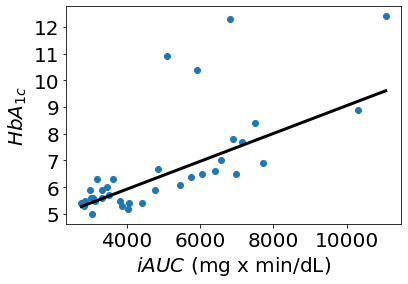

In [9]:
import statsmodels.api as sm
import pickle
df_corr_final[['aucsq']] = df_corr_final[['auc']].values**2
X = df_corr_final[['auc']] 
Y = df_corr_final['a1c']

X = sm.add_constant(X) # adding a constant

model1 = sm.RLM(Y, X, M=sm.robust.norms.HuberT()).fit()
predictions = model1.predict(X) 

print_model1 = model1.summary()
print(print_model1)

plt.figure()
plt.scatter(df_corr_final[['auc']].values, df_corr_final['a1c'].values)

Xtemp= np.arange(np.min(df_corr_final[['auc']].values), np.max(df_corr_final[['auc']].values)).reshape(-1,1)
X=Xtemp
# X=np.concatenate([Xtemp, Xtemp**2], axis=1)
X = sm.add_constant(X)

plt.plot(Xtemp, model1.predict(X), 'k-', linewidth=3)
plt.xlabel('$iAUC$ (mg x min/dL)', fontsize=20)
plt.ylabel('$HbA_{1c}$', fontsize=20)
plt.xticks(fontsize= 20)
plt.yticks(fontsize= 20)
# plt.savefig('/Users/amrutapai/Documents/SDRIpaper1/regress_revis.svg', format='svg')

# thres_found = (5.7 - model1.params['const'])/model1.params['auc']
# print('auc threshold found {0}'.format(thres_found))

# thres_found1 = (6.5 - model1.params['const'])/model1.params['auc']
# print('auc threshold found {0}'.format(thres_found1))

filename = 'finalized_model_test1_revis.sav'
pickle.dump(model1, open(filename, 'wb'))

(0.7161826849746491, 9.044936071021106e-07)
0.7983779273192333
(0.8767647104266657, 4.732102544751963e-11)
0.4114421594990748


(array([ 4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

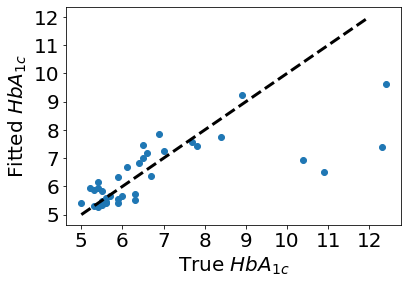

In [10]:
fitted = model1.fittedvalues
true = df_corr_final['a1c'].values

print(stats.pearsonr(fitted, true))
print(np.mean(np.abs(fitted-true)))

fitted_n = model1.fittedvalues[df_corr_final['a1c'].values < 10]
true_n = df_corr_final['a1c'].values[df_corr_final['a1c'].values < 10]

print(stats.pearsonr(fitted_n, true_n))
print(np.mean(np.abs(fitted_n-true_n)))


plt.scatter(true, fitted)
plt.plot(np.arange(5, 13), np.arange(5, 13), 'k--', linewidth=3)
plt.xlabel('True $HbA_{1c}$', fontsize=20)
plt.ylabel('Fitted $HbA_{1c}$', fontsize=20)
plt.xticks(fontsize= 20)
plt.yticks(fontsize= 20)
# plt.savefig('/Users/amrutapai/Documents/SDRIpaper1/corr_revis.svg', format='svg')



In [11]:
def convert_min_15(acti_min, dff_cgm):
    
    acti = pd.DataFrame()
    
    
    acti['stepcount'] =[np.sum(acti_min.loc[np.where((acti_min['datetime'].values >= dff_cgm['datetime'][i]) & 
                    (acti_min['datetime'].values < (dff_cgm['datetime'][i]+datetime.timedelta(minutes=15))))[0], 'stepcount'].values) for i in range(len(dff_cgm))] 
    
    acti['kcals out'] =[ np.sum(acti_min.loc[np.where((acti_min['datetime'].values >= dff_cgm['datetime'][i]) & 
                    (acti_min['datetime'].values < (dff_cgm['datetime'][i]+datetime.timedelta(minutes=15))))[0], 'kcals out'].values) for i in range(len(dff_cgm))] 
                                         
    
    acti['datetime'] = dff_cgm['datetime'].values 
    
    return acti
    

In [17]:
n_meals_across = []
plot=False
main_folder = '/Users/amrutapai/Library/CloudStorage/Box-Box/SDRI Datasets/SDRI-Rice Digital-Health-Study/'
df_cor_labels = pd.read_csv(os.path.join(main_folder, 'final_times_revis.csv'))
df_cor_labels = df_cor_labels[(df_cor_labels['time_final'] >= 4) & (df_cor_labels['time_final'] <= 24)].reset_index(drop=True)
df_cor_labels['datetime'] = [datetime.datetime.strptime(df_cor_labels['date'].values[i],'%m/%d/%y') for i in range(len(df_cor_labels['date'].values))] 




df_all_day = pd.DataFrame()
for i, pc in enumerate(np.arange(1, 37,1)):
    print("-----------------------------------------------------------------------------------------------")
    print(pc)
     
    
    if 1:
        if len(str(pc)) == 1:
                nm = '00'+ str(pc)
        else:
                nm = '0'+ str(pc)

        pct_name = 'digh01'+ nm 
        
        
        
        for filename in os.listdir(os.path.join(main_folder, pct_name)):
            
            if filename.startswith("CGM"):
                cgm_filename = filename
          
                
        df = pd.read_csv(os.path.join(main_folder,pct_name,cgm_filename), skiprows=[0,1]) 
        df_cgm = pd.DataFrame(columns=['datetime','glucose'])
        df_cgm['datetime'] = [datetime.datetime.strptime(df['Device Timestamp'].values[i], 
                                                     '%m/%d/%Y %H:%M') 
                          for i in range(len(df['Device Timestamp'].values))]

        df_cgm['glucose'] = df['Historic Glucose mg/dL']
        df_day = df_cgm ['datetime'].dt.date
        time_axis = df_cgm['datetime'].dt.hour + (df_cgm['datetime'].dt.minute / 60)
        
        cgm_ylim_min = np.min(df_cgm['glucose'].values)
        cgm_ylim_max = np.max(df_cgm['glucose'].values)
        
        
         
        for filename in os.listdir(os.path.join(main_folder, pct_name, 'Actigraph_DigH01-'+pct_name[-3:])):
                    if "AGD Details Epochs" in filename:
                        acti_filename = filename

        df = pd.read_csv(os.path.join(main_folder, pct_name, 'Actigraph_DigH01-'+pct_name[-3:], acti_filename), skiprows=[0]) 
        df_acti_min = pd.DataFrame(columns=['datetime','kcals out','stepcount'])
        df_acti_min['datetime'] = [ datetime.datetime.strptime(
            df['date'][j]+' '+df['epoch'][j], '%m/%d/%Y %I:%M:%S %p') for j in range(len(df))]
        df_acti_min['kcals out'] = df['kcals']                                                   
        df_acti_min['stepcount'] = df['steps']
        df_acti_min['hrs'] =  df_acti_min['datetime'].dt.hour
        
        df_acti = convert_min_15(df_acti_min, df_cgm)
        
        df_day_acti = df_acti['datetime'].dt.date
#         time_axis_acti = df_acti['datetime'].dt.hour + (df_acti['datetime'].dt.minute / 60)
        
       
        
        for dt_nm in np.unique(df_day):
            
            idx_cgm = np.where(df_day == dt_nm)[0]
            cgm_val = df_cgm['glucose'].values[idx_cgm]
            time_axis = df_cgm['datetime'].dt.hour + (df_cgm['datetime'].dt.minute / 60)
            time_axis_acti = df_acti['datetime'].dt.hour + (df_acti['datetime'].dt.minute / 60)
            
            time_axis[idx_cgm[-1]+1:] = time_axis[idx_cgm[-1]+1:] + 24
            time_axis_acti[idx_cgm[-1]+1:] = time_axis_acti[idx_cgm[-1]+1:] + 24
        
        
            fd_corr = df_cor_labels[(df_cor_labels['uid'] == pc) & (
                                    df_cor_labels['datetime'].dt.date == dt_nm)].reset_index(
                            drop=True)['time_final'].values

            
            fd_all = np.sort(fd_corr)
            
#             print(fd_corr)
#             print(fd_corr_big3)
           
            
            

           
            
            
            if (len(cgm_val)) < 90 or (len(np.where(cgm_val >= 500)[0]) >= 1) or (len(np.where(cgm_val <= 40)[0]) >= 1):
                
                continue
              
                
           
                
            
#             n_add = 0
            
            
            stps = np.where((df_acti_min['datetime'].dt.date==dt_nm) & (df_acti_min['datetime'].dt.hour >= 4))[0]
            
            
            n_meals_across.append(len(fd_all))
            
            
               
            
            if  len(fd_all) >= 1 and len(stps) >= 10*60:
                
                act_star_ind = np.where((df_acti_min['datetime'].dt.date==dt_nm) &(df_acti_min['stepcount']>=0) & (df_acti_min['datetime'].dt.hour >=4))[0][0]
                act_start = df_acti_min['datetime'].dt.hour[act_star_ind] + (df_acti_min['datetime'].dt.minute[act_star_ind]/ 60)
                
                act_end_ind = np.where((df_acti_min['datetime'].dt.date==dt_nm) &(df_acti_min['stepcount']>=0) & (df_acti_min['datetime'].dt.hour >=4))[0][-1]
                act_end = df_acti_min['datetime'].dt.hour[act_end_ind] + (df_acti_min['datetime'].dt.minute[act_end_ind]/ 60)
                
                
                start_time = np.min([act_start, np.min(fd_all)])
                end_time = np.max([act_end, (np.max(fd_all)+3)])
                
#                 len(fd_all) >= 1 and np.min(fd_all) <= 12
                
                
                if plot==True:
                    fig, axs = plt.subplots(2, figsize=[8, 3], sharex=True)
                    axs[0].plot(time_axis[idx_cgm[0]: idx_cgm[-1]+13], df_cgm['glucose'].values[idx_cgm[0]: idx_cgm[-1]+13],  'b*-')

                
                auc_all = []
                


                for fd_min_ix, fd_min in enumerate(fd_all):

                    cgm_time_dec = (np.array([v*60 for v in df_cgm['datetime'].dt.hour.values[idx_cgm]]) + np.array([v for v in df_cgm['datetime'].dt.minute.values[idx_cgm]]))/(24*60)
                    t_diff = np.abs(cgm_time_dec -  (fd_min/24))
                    idx_min = np.argmin(t_diff)
                    idx_f = idx_cgm[0] + idx_min
                    baseline = np.mean(cgm_val[(cgm_time_dec < 5/24) & (cgm_time_dec > 0/24)])

                    auc_f2, auc_f3, auc_f4, t2p, peak_val, maxval, bval  = auc(df_cgm['glucose'].values, idx_cgm[0], idx_f - idx_cgm[0], np.min(t_diff))

                    
                    auc_all.append(auc_f3)
                    
                    
                    
                    
                    if plot==True:
                        axs[0].plot(time_axis[idx_f : idx_f+13], df_cgm['glucose'].values[idx_f : idx_f+13], 'k*-')
                        axs[0].axvline(x=time_axis[idx_f], c='k')
                    
                    
#                 top3_ind = np.argsort(auc_all)
        
                
#                 top3_ind_by_time = np.argsort(fd_all[top3_ind[-3:]])
                
                
                fd_min = start_time
                cgm_time_dec = (np.array([v*60 for v in df_cgm['datetime'].dt.hour.values[idx_cgm]]) + np.array([v for v in df_cgm['datetime'].dt.minute.values[idx_cgm]]))/(24*60)
                t_diff = np.abs(cgm_time_dec -  (fd_min/24))
                idx_min = np.argmin(t_diff)
                idx_f = idx_cgm[0] + idx_min   
                idx_start = idx_f 
               
                if end_time < 24:

                    fd_min = end_time
                    cgm_time_dec = (np.array([v*60 for v in df_cgm['datetime'].dt.hour.values[idx_cgm]]) + np.array([v for v in df_cgm['datetime'].dt.minute.values[idx_cgm]]))/(24*60)
                    t_diff = np.abs(cgm_time_dec -  (fd_min/24))
                    idx_min = np.argmin(t_diff)
                    idx_f = idx_cgm[0] + idx_min   
                    idx_end = idx_f 
                    
                    
                else:
                    idx_cgm_n = np.where(df_day == (dt_nm + datetime.timedelta(days=1)))[0]
                    fd_min = end_time - 24
                    cgm_time_dec_n = (np.array([v*60 for v in df_cgm['datetime'].dt.hour.values[idx_cgm_n]]) + np.array([v for v in df_cgm['datetime'].dt.minute.values[idx_cgm_n]]))/(24*60)
                    t_diff = np.abs(cgm_time_dec_n -  (fd_min/24))
                    idx_min = np.argmin(t_diff)
                    idx_f = idx_cgm_n[0] + idx_min   
                    idx_end = idx_f 
                    
                    
                
                stps_1 = np.arange(idx_start, idx_end)
                
                
#                 activity_con = np.sum(df_acti.loc[stps_1, 'stepcount']) if np.sum(df_acti.loc[stps_1, 'stepcount'])< 20000 else 20000
                
                activity_con = np.sum(df_acti.loc[stps_1, 'stepcount']) 
        
#                 if activity_con/1000 >=30:
#                     continue
                
                if activity_con>=5000:
                    
                    activity_class = 1
                    
                else:
                    
                    activity_class = 0
                    
                
                if a1c[i] < 5.7:
                    st = 'at-risk'
                    
#                     auc_all_class = [1 if model1.predict(np.array([1, s, s**2])) >= 5.7 else 0 for s in auc_all]
                    auc_all_class = [1 if model1.predict(np.array([1, s])) >= 5.7 else 0 for s in auc_all]
                    
                elif a1c[i] >= 5.7 and a1c[i] <= 6.4:

                    st = 'pre-T2D'
#                     auc_all_class = [1 if model1.predict(np.array([1, s, s**2])) >= 5.7 else 0 for s in auc_all]
                    auc_all_class = [1 if model1.predict(np.array([1, s])) >= 5.7 else 0 for s in auc_all]
                else:

                    st = 'T2D'
#                     auc_all_class = [1 if model1.predict(np.array([1, s, s**2])) >= 6.5 else 0 for s in auc_all]
                    auc_all_class = [1 if model1.predict(np.array([1, s])) >= 6.5 else 0 for s in auc_all]
                
    
# #                 print(idx_start)
# #                 print(idx_end)
                tir = 100*len(np.where( (df_cgm['glucose'].values[(idx_start):(idx_end+1)]<= 140) & (df_cgm['glucose'].values[(idx_start):(idx_end+1)]>=70))[0])/((idx_end+1)-(idx_start))
                avgG = np.mean(df_cgm['glucose'].values[(idx_start):(idx_end+1)])

        
                if plot==True:
                
#                     axs[0].axvline(x=time_axis[idx_start], c='k')           
                    fig.suptitle(pct_name+ " "+ dt_nm.strftime('%m/%d/%Y'), fontsize=20)
#                     axs[1].set_xlabel('time of the day (hours)', fontsize=20)
#                     axs[0].set_ylabel('glucose level (mg/dl)', fontsize=20)
                    axs[1].bar(time_axis_acti[idx_cgm[0]:(idx_cgm[-1]+13)],df_acti['stepcount'].values[idx_cgm[0]:(idx_cgm[-1]+13)], width=0.23)
#                     axs[1].set_ylabel('activity stepcount (steps)', fontsize=20)
#                     axs[0].xticks(fontsize= 20)
#                     axs[0].yticks(fontsize= 20)
#                     axs[1].xticks(fontsize= 20)
#                     axs[1].yticks(fontsize= 20)
                    axs[0].axvline(x=time_axis_acti[idx_start], c='y')
                    axs[0].axvline(x=time_axis_acti[idx_end], c='y')
                    axs[0].set_ylim(cgm_ylim_min, cgm_ylim_max)
                    axs[0].tick_params(axis="x", labelsize=20) 
                    axs[0].tick_params(axis="y", labelsize=20)
                    axs[1].tick_params(axis="x", labelsize=20) 
                    axs[1].tick_params(axis="y", labelsize=20)
#                     plt.savefig('/Users/amrutapai/Documents/SDRIpaper1/all_meal_profiles/'+pct_name+ '-' +str(dt_nm) +'.svg', format='svg')
                    plt.show()
                    
#                     print(fd_all)
#                 print(auc_all_class)
                
#                 print(((idx_cgm[-1]+13) - idx_start)/4)
#                 print(avgG)
     
                df_all_day = pd.concat([df_all_day, pd.DataFrame.from_dict([{'date':  dt_nm, 'uid':pc, 'a1c': a1c[i],
                                        'tir': tir,
                                        'avgG': avgG,                    
                                        'status': st,
                                        'activity_class':activity_class,
                                        'base': df_cgm['glucose'].values[idx_start], 
                                        'duration': ((idx_end) - (idx_start))/4,
                                        'total_food': np.sum(auc_all),
                                        'all_freq_big_meal': len(np.where(np.array(auc_all_class)==1)[0]),
                                        'n_meal': len(fd_all),
                                        'activity_con': activity_con/1000,
                                        'start_time': np.min(fd_all),
                                        'event_ct': auc_all_class,                                  
                                       }])],ignore_index=True)

    
        
print(len(df_all_day))


-----------------------------------------------------------------------------------------------
1
-----------------------------------------------------------------------------------------------
2
-----------------------------------------------------------------------------------------------
3
-----------------------------------------------------------------------------------------------
4
-----------------------------------------------------------------------------------------------
5
-----------------------------------------------------------------------------------------------
6
-----------------------------------------------------------------------------------------------
7
-----------------------------------------------------------------------------------------------
8
-----------------------------------------------------------------------------------------------
9
-----------------------------------------------------------------------------------------------
10
-------------------

In [18]:

df_all_days_c2 = df_all_day[(df_all_day['status']=='at-risk')].reset_index(drop=True)
# [(df_all_day['status']=='pre-T2D')].reset_index(drop=True)

sum_name = df_all_days_c2['all_freq_big_meal']

# str_name = np.array([str(df_all_days_c2.loc[x, 'meal_1'])+str(df_all_days_c2.loc[x, 'meal_2'])+str(df_all_days_c2.loc[x, 'meal_3']) for x in range(len(df_all_days_c2))]) 
TIR =  df_all_days_c2['tir'].values  
descript = np.array([df_all_days_c2.loc[x, 'date'].strftime("%B %d, %Y")+" "+str(df_all_days_c2.loc[x, 'uid']) for x in range(len(df_all_days_c2))])

fig = go.Figure(layout = go.Layout(
            plot_bgcolor="#FFF",  # Sets background color to white
            xaxis=dict(
                linecolor="black",  # Sets color of X-axis line
                showgrid=False  # Removes X-axis grid lines
            ),
            yaxis=dict(
                title="TIR 54-140",  
                linecolor="black",  # Sets color of Y-axis line
                showgrid=False,  # Removes Y-axis grid lines    
            ),
            font=dict(
                family="Helvetica",
                size=24,
                color="black"
            )
        ))
fig.update_yaxes(range=[70, 101])
# fig.add_trace(go.Box(y=[50,50], boxpoints='all', text= descript[np.where(str_name == ty)[0]], boxmean=False, name=0))
for ty in [0, 1, 2, 3]:
    print(len(np.where(sum_name == ty)[0]))
    
    if len(np.where(sum_name == ty)[0]) !=0 :

        fig.add_trace(go.Box(y=TIR[np.where(sum_name == ty)[0]],boxpoints='all',  text= descript[np.where(sum_name == ty)[0]], name=ty))
    else:
        
        fig.add_trace(go.Box(y=[50,50], boxpoints='all', text= descript[np.where(sum_name == ty)[0]], name=ty))
        

        
fig.show()
# fig.write_image("/Users/amrutapai/Documents/SDRIpaper1/tir_atrisk_revis.svg")

35
45
44
10


In [19]:

df_all_days_c2 = df_all_day[(df_all_day['status']=='pre-T2D')].reset_index(drop=True)
# [(df_all_day['status']=='pre-T2D')].reset_index(drop=True)

sum_name = df_all_days_c2['all_freq_big_meal']

# str_name = np.array([str(df_all_days_c2.loc[x, 'meal_1'])+str(df_all_days_c2.loc[x, 'meal_2'])+str(df_all_days_c2.loc[x, 'meal_3']) for x in range(len(df_all_days_c2))]) 
TIR =  df_all_days_c2['tir'].values  
descript = np.array([df_all_days_c2.loc[x, 'date'].strftime("%B %d, %Y")+" "+str(df_all_days_c2.loc[x, 'uid']) for x in range(len(df_all_days_c2))])

fig = go.Figure(layout = go.Layout(
            plot_bgcolor="#FFF",  # Sets background color to white
            xaxis=dict(
                linecolor="black",  # Sets color of X-axis line
                showgrid=False  # Removes X-axis grid lines
            ),
            yaxis=dict(
                title="TIR 54-140",  
                linecolor="black",  # Sets color of Y-axis line
                showgrid=False,  # Removes Y-axis grid lines    
            ),
            font=dict(
                family="Helvetica",
                size=24,
                color="black"
            )
        ))
fig.update_yaxes(range=[50, 101])
# fig.add_trace(go.Box(y=[50,50], boxpoints='all', text= descript[np.where(str_name == ty)[0]], boxmean=False, name=0))
for ty in [0, 1, 2, 3]:
    print(len(np.where(sum_name == ty)[0]))
    
    if len(np.where(sum_name == ty)[0]) !=0 :

        fig.add_trace(go.Box(y=TIR[np.where(sum_name == ty)[0]],boxpoints='all',  text= descript[np.where(sum_name == ty)[0]], name=ty))
    else:
        
        fig.add_trace(go.Box(y=[50,50], boxpoints='all', text= descript[np.where(sum_name == ty)[0]], name=ty))
        

        
fig.show()
# fig.write_image("/Users/amrutapai/Documents/SDRIpaper1/tir_atrisk_revis.svg")

14
30
37
20


In [20]:

df_all_days_c2 = df_all_day[(df_all_day['status']=='T2D')].reset_index(drop=True)
# [(df_all_day['status']=='pre-T2D')].reset_index(drop=True)

sum_name = df_all_days_c2['all_freq_big_meal']

# str_name = np.array([str(df_all_days_c2.loc[x, 'meal_1'])+str(df_all_days_c2.loc[x, 'meal_2'])+str(df_all_days_c2.loc[x, 'meal_3']) for x in range(len(df_all_days_c2))]) 
TIR =  df_all_days_c2['tir'].values  
descript = np.array([df_all_days_c2.loc[x, 'date'].strftime("%B %d, %Y")+" "+str(df_all_days_c2.loc[x, 'uid']) for x in range(len(df_all_days_c2))])

fig = go.Figure(layout = go.Layout(
            plot_bgcolor="#FFF",  # Sets background color to white
            xaxis=dict(
                linecolor="black",  # Sets color of X-axis line
                showgrid=False  # Removes X-axis grid lines
            ),
            yaxis=dict(
                title="TIR 54-140",  
                linecolor="black",  # Sets color of Y-axis line
                showgrid=False,  # Removes Y-axis grid lines    
            ),
            font=dict(
                family="Helvetica",
                size=24,
                color="black"
            )
        ))
fig.update_yaxes(range=[0, 101])
# fig.add_trace(go.Box(y=[50,50], boxpoints='all', text= descript[np.where(str_name == ty)[0]], boxmean=False, name=0))
for ty in [0, 1, 2, 3]:
    print(len(np.where(sum_name == ty)[0]))
    
    if len(np.where(sum_name == ty)[0]) !=0 :

        fig.add_trace(go.Box(y=TIR[np.where(sum_name == ty)[0]],boxpoints='all',  text= descript[np.where(sum_name == ty)[0]], name=ty))
    else:
        
        fig.add_trace(go.Box(y=[50,50], boxpoints='all', text= descript[np.where(sum_name == ty)[0]], name=ty))
        

        
fig.show()
# fig.write_image("/Users/amrutapai/Documents/SDRIpaper1/tir_atrisk_revis.svg")

6
28
68
27


In [21]:
df_all_day_grps = df_all_day.copy()
# df_all_day_grps = df_all_day[(df_all_day['status']=='T2D')].reset_index(drop=True)
df =  df_all_day_grps[['tir','avgG','base','all_freq_big_meal','activity_con','duration', 'uid','a1c']]
data = df.copy()
data.loc[df['all_freq_big_meal']>=4, 'all_freq_big_meal'] = 3
data['tir_log'] = np.log(data['tir'].values + 1)
data['avgG_log'] = np.log(data['avgG'].values)
T = data['activity_con'].values

In [22]:

%load_ext rpy2.ipython

In [23]:
%%R -i data,T -o betas,fitted_val,resid_val,Tps_MLM_op1
library(lmerTest)
data$all_freq_big_meal <- factor(data$all_freq_big_meal, levels=0:3)
num.mod <- lmer('activity_con ~ (1|uid)', data=data,) # numerator model for option 1
print(summary(num.mod))
den.mod <- lmer('activity_con ~ (1|uid) + (all_freq_big_meal)+ base  +  duration', data=data)
print(summary(den.mod))
num.p_op1 <- dnorm(T, mean = fitted(num.mod), sd = attr(VarCorr(num.mod), "sc"))
den.p <- dnorm(T, mean = fitted(den.mod), sd = attr(VarCorr(den.mod), "sc"))
Tps_MLM_op1 <- num.p_op1/den.p
m1<-lmer('tir~ (all_freq_big_meal) + activity_con + base  + duration+ (1|uid)', data=data, weight=Tps_MLM_op1)
print(summary(m1))
m<-lmer('avgG~ (all_freq_big_meal) + activity_con + base  + duration+ (1|uid)', data=data, weight=Tps_MLM_op1)
print(summary(m))
betas <- fixef(m)
fitted_val <- fitted(m)
resid_val <- resid(m)


R[write to console]: Loading required package: lme4

R[write to console]: Loading required package: Matrix

R[write to console]: 
Attaching package: ‘lmerTest’


R[write to console]: The following object is masked from ‘package:lme4’:

    lmer


R[write to console]: The following object is masked from ‘package:stats’:

    step




Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: "activity_con ~ (1|uid)"
   Data: data

REML criterion at convergence: 1933.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.9915 -0.5661 -0.0760  0.4677  5.6281 

Random effects:
 Groups   Name        Variance Std.Dev.
 uid      (Intercept) 16.087   4.011   
 Residual              8.319   2.884   
Number of obs: 369, groups:  uid, 36

Fixed effects:
            Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)   7.9331     0.6895 35.7437   11.51 1.43e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: "activity_con ~ (1|uid) + (all_freq_big_meal)+ base  +  duration"
   Data: data

REML criterion at convergence: 1913.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.8117 -0.5096 -0.0278  0.4468  5.7753 

Random effects:
 Groups   Nam

In [24]:
%%R -i data,Tps_MLM_op1
library("cobalt")
data$all_freq_big_meal <- factor(data$all_freq_big_meal, levels=0:3)
covs <- subset(data, select = -c(activity_con, a1c, tir, tir_log, avgG_log, avgG, uid))
bal.tab(covs, stats = c("correlations", "ks.statistics"), treat = data$activity_con)


R[write to console]:  cobalt (Version 4.4.1, Build Date: 2022-11-03)



Balance Measures
                       Type Corr.Un
base                Contin. -0.1853
all_freq_big_meal_0  Binary  0.0839
all_freq_big_meal_1  Binary -0.0763
all_freq_big_meal_2  Binary  0.0245
all_freq_big_meal_3  Binary -0.0205
duration            Contin.  0.1477

Sample sizes
    Total
All   369


In [25]:
%%R -i data,Tps_MLM_op1
library("cobalt")
data$all_freq_big_meal <- factor(data$all_freq_big_meal, levels=0:3)
covs <- subset(data, select = -c(activity_con, tir, a1c, tir_log, avgG_log, avgG, uid))
bal.tab(covs, stats = c("correlations", "ks.statistics.target"), treat = data$activity_con, weights= Tps_MLM_op1)


Balance Measures
                       Type Corr.Adj KS.Adj
base                Contin.  -0.1785 0.0121
all_freq_big_meal_0  Binary   0.0254 0.0087
all_freq_big_meal_1  Binary  -0.0463 0.0062
all_freq_big_meal_2  Binary   0.0270 0.0023
all_freq_big_meal_3  Binary  -0.0040 0.0002
duration            Contin.   0.0949 0.0077

Effective sample sizes
            Total
Unadjusted 369.  
Adjusted   345.06


In [26]:
df_all_day_grps = df_all_day.copy()
# df_all_day_grps = df_all_day[(df_all_day['status']=='T2D')].reset_index(drop=True)
df =  df_all_day_grps[['tir','avgG','base','all_freq_big_meal','activity_con','duration', 'uid','a1c']]
data = df.copy()
data.loc[data['all_freq_big_meal']>=4, 'all_freq_big_meal'] = 3

# data.loc[data['all_freq_big_meal']==0, 'all_freq_big_meal'] = 5
# data.loc[data['all_freq_big_meal']==1, 'all_freq_big_meal'] = 0
# data.loc[data['all_freq_big_meal']==5, 'all_freq_big_meal'] = 1

data['tir_log'] = np.log(data['tir'].values + 1)
data['avgG_log'] = np.log(data['avgG'].values)
T = data['all_freq_big_meal'].values

In [27]:
%%R -i data -o pp

library(mclogit)
data$all_freq_big_meal <- factor(data$all_freq_big_meal, levels=0:3)
# print(cbind(data$all_freq_big_meal, 1))
# model_treat <- mblogit(all_freq_big_meal ~    random=~1|uid , data = data)
model_treat <- mblogit(all_freq_big_meal ~  activity_con + duration + base, random=~1|uid, data = data)
print(summary(model_treat))
pp <- predict(model_treat, type="response")



R[write to console]: Warning:
R[write to console]:  Inner iterations did not coverge - nlminb message: false convergence (8)




Iteration 1 - deviance = 907.7094 - criterion = 0.9354517

R[write to console]: Warning:
R[write to console]:  Inner iterations did not coverge - nlminb message: false convergence (8)




Iteration 2 - deviance = 898.5497 - criterion = 0.05436598

R[write to console]: Warning:
R[write to console]:  Inner iterations did not coverge - nlminb message: false convergence (8)




Iteration 3 - deviance = 897.9106 - criterion = 0.003246102

R[write to console]: Warning:
R[write to console]:  Inner iterations did not coverge - nlminb message: false convergence (8)




Iteration 4 - deviance = 897.6701 - criterion = 1.611673e-05

R[write to console]: Warning:
R[write to console]:  Inner iterations did not coverge - nlminb message: false convergence (8)




Iteration 5 - deviance = 897.6606 - criterion = 3.139427e-10
converged

Call:
mblogit(formula = all_freq_big_meal ~ activity_con + duration + 
    base, data = data, random = ~1 | uid)

Equation for 1 vs 0:
              Estimate Std. Error z value Pr(>|z|)  
(Intercept)  -2.408722   1.430730  -1.684   0.0923 .
activity_con -0.074430   0.040377  -1.843   0.0653 .
duration      0.149122   0.072044   2.070   0.0385 *
base          0.011075   0.008444   1.312   0.1897  

Equation for 2 vs 0:
              Estimate Std. Error z value Pr(>|z|)  
(Intercept)  -2.294517   1.526745  -1.503   0.1329  
activity_con -0.020985   0.040472  -0.519   0.6041  
duration      0.118269   0.076864   1.539   0.1239  
base          0.015320   0.008639   1.773   0.0762 .

Equation for 3 vs 0:
              Estimate Std. Error z value Pr(>|z|)  
(Intercept)  -3.474231   1.841788  -1.886   0.0592 .
activity_con -0.067153   0.052258  -1.285   0.1988  
duration      0.158176   0.093623   1.690   0.0911 .
base  

In [28]:
prob = 1/np.array([pp[i,data['all_freq_big_meal'].values[i]] for i in range(len(data))])


(array([10., 38., 35., 58., 53., 66., 61., 28.,  9., 11.]),
 array([0.05834136, 0.12613416, 0.19392696, 0.26171976, 0.32951257,
        0.39730537, 0.46509817, 0.53289098, 0.60068378, 0.66847658,
        0.73626938]),
 <BarContainer object of 10 artists>)

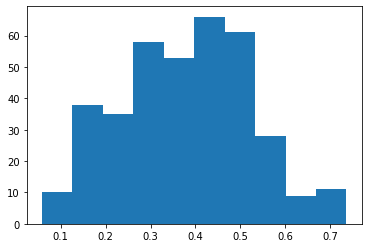

In [29]:
plt.hist(np.array([pp[i,data['all_freq_big_meal'].values[i]] for i in range(len(data))]))

In [30]:
%%R -i data,prob -o resid_val
library(lmerTest)
library(emmeans)
data$all_freq_big_meal <- factor(data$all_freq_big_meal, levels=0:3)

data$duration= data$duration
m<-lmer('tir~ all_freq_big_meal + activity_con + base + duration + (1|uid)', data=data, weights=prob)

# print(lsmeans(m, pairwise~all_freq_big_meal))
print(summary(m))
m1<-lmer('avgG~ all_freq_big_meal + activity_con + base + duration + (1|uid)', data=data, weights=prob, control=lmerControl(optimizer="bobyqa",
                            optCtrl=list(maxfun=2e5)))
print(summary(m1))
resid_val <- residuals(m1, type='pearson')

# betas <- fixef(m)
# fitted_val <- fitted(m)



Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: "tir~ all_freq_big_meal + activity_con + base + duration + (1|uid)"
   Data: data
Weights: prob

REML criterion at convergence: 2840.6

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.7169 -0.4173  0.0555  0.4480  4.2805 

Random effects:
 Groups   Name        Variance Std.Dev.
 uid      (Intercept) 460.6    21.46   
 Residual             260.2    16.13   
Number of obs: 369, groups:  uid, 36

Fixed effects:
                    Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)         89.85864    7.22047 242.80395  12.445  < 2e-16 ***
all_freq_big_meal1  -1.35387    1.44158 326.54832  -0.939  0.34835    
all_freq_big_meal2  -4.37653    1.46695 328.12805  -2.983  0.00306 ** 
all_freq_big_meal3  -8.41784    1.64493 329.80928  -5.117 5.27e-07 ***
activity_con        -0.19633    0.17586 347.83181  -1.116  0.26501    
base                -0.23372    0.02714 359.82559  -

In [31]:
%%R -i data,prob

library("cobalt")
data$all_freq_big_meal <- factor(data$all_freq_big_meal, levels=0:4)
covs <- subset(data, select = -c(all_freq_big_meal, tir, tir_log, avgG_log, a1c, avgG, uid))
bal.tab(covs, treat = data$all_freq_big_meal, stats="m", s.d.denom='pooled')




Balance summary across all treatment pairs
                Type Max.Diff.Un
base         Contin.      0.5736
activity_con Contin.      0.3272
duration     Contin.      0.3851

Sample sizes
     0   1   2  3
All 55 103 149 62


In [32]:
%%R -i data,prob
library("cobalt")
data$all_freq_big_meal <- factor(data$all_freq_big_meal, levels=0:4)
covs <- subset(data, select = -c(all_freq_big_meal, tir, tir_log, avgG_log, a1c, avgG, uid))
bal.tab(covs, treat = data$all_freq_big_meal, weights = prob, stats="m", s.d.denom='pooled')



Balance summary across all treatment pairs
                Type Max.Diff.Adj
base         Contin.       0.4100
activity_con Contin.       0.2465
duration     Contin.       0.1098

Effective sample sizes
               0      1      2     3
Unadjusted 55.   103.   149.   62.  
Adjusted   40.44  82.07 136.59 52.78


In [ ]:
s=[1,2,3]
print(s[0:2])

In [ ]:
%%R 

library("cobalt")
packageVersion("cobalt")